In [96]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [97]:
data=pd.read_excel(r"C:\Users\Julaysa\Desktop\Задача\Date.xlsx")

In [98]:
data.head()

,Структура,Скважина,Месторождение,Класс мероприятий,Вид ресурса,№ Ресурса,Мероприятия,Начало,Окончание,Длительность,Q нефти т/сут,Q Жидкости м3/сут,Обводненность %,Q пг м3/сут,ГФ пг м3/т
0,УПБ,2481,Калининское,База,КРС,КРС-1,КР подобъектов кустовых площадок,2021-04-24 09:00:00,2021-04-25 00:00:00,0.625,20.545590,26,5.25,30711,1494.773331
1,УПБ,2481,Калининское,База,КРС,КРС-2,Вывоз мусора,2021-04-21 09:00:00,2021-04-22 00:00:00,0.625,42.835716,51,1.00,76016,1774.593893
2,УПБ,2481,Калининское,Недоборы,Бригада,Бригада-1,Запуск скважины,2021-04-15 09:00:00,2021-04-29 09:00:00,14.000,20.408500,25,2.00,99967,4898.302178
3,УМТО,241,Калининское,Недоборы,Бригада,Бригада-2,Запуск скважины,2021-04-23 09:00:00,2021-04-24 00:00:00,0.625,41.237707,66,25.75,70054,1698.785026
4,УМТО,241,Калининское,ГТМ,Бригада,Бригада-3,Бурение,2021-03-01 00:00:00,2021-03-31 00:00:00,30.000,22.313760,42,42.00,136220,6104.753300


# Нефть

In [99]:
data_neft_1=data.groupby(["Месторождение","Скважина"],as_index=False) \
.aggregate({"Q нефти т/сут":"sum"}) \
.sort_values("Q нефти т/сут",ascending=False)

In [100]:
data_neft_1

,Месторождение,Скважина,Q нефти т/сут
3,Ивановское,8765,191.748000
21,Петровское,88,176.509080
22,Петровское,190,171.513540
0,Ивановское,18,151.993930
19,Ленинское,9474,134.055400
25,Петровское,9299,133.895610
16,Ленинское,2277,111.953920
2,Ивановское,569,110.297150
14,Ленинское,2009,104.073750
20,Петровское,65,104.048520


In [101]:
data_neft_2=data.groupby(["Месторождение"],as_index=False) \
.aggregate({"Q нефти т/сут":"sum"}) \
.sort_values("Q нефти т/сут",ascending=False)

In [102]:
data_neft_2

,Месторождение,Q нефти т/сут
2,Ленинское,1027.702448
3,Петровское,707.745652
0,Ивановское,507.425760
1,Калининское,147.341273


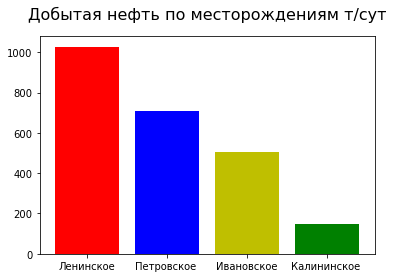

In [137]:
values=data_neft_2['Q нефти т/сут']
colors=["r","b","y","g"]
name=data_neft_2['Месторождение']
plt.bar(range(0,4),values,color=colors,tick_label=name)
plt.title(r'Добытая нефть по месторождениям т/сут', fontsize=16, y=1.05);

# Жидкость

In [138]:
data_water=data.groupby(["Месторождение"],as_index=False) \
.aggregate({"Q Жидкости м3/сут":"sum"}) \
.sort_values("Q Жидкости м3/сут",ascending=False)

In [139]:
data_water

,Месторождение,Q Жидкости м3/сут
2,Ленинское,1305
3,Петровское,865
0,Ивановское,649
1,Калининское,210


([<matplotlib.patches.Wedge at 0x1c9d4242730>,
 [Text(0.2371398501222306, 1.074134391723869, 'Ленинское'),
  Text(-0.9843953084107991, -0.49088275257825864, 'Петровское '),
  Text(0.6241100479790023, -1.2531905872658187, 'Ивановское'),
  Text(1.0740112557646746, -0.2376969130863655, 'Калининское ')])

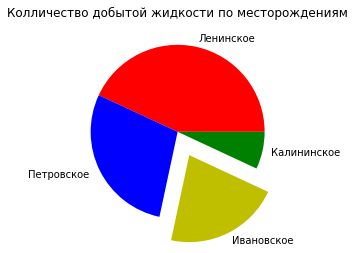

In [136]:
values=data_water['Q Жидкости м3/сут']
name=data_water['Месторождение']
colors=["r","b","y","g"]
plt.title("Колличество добытой жидкости по месторождениям")
explode=[0,0,0.3,0]
plt.pie(values,colors=colors,labels=name,explode=explode)

# Мероприятия по месторождению Ленинское

In [140]:
data_m=data.groupby(["Месторождение","Класс мероприятий"],as_index=False) \
.aggregate({"Вид ресурса":"count"}) \
.sort_values("Вид ресурса",ascending=False) \
.rename(columns={"Вид ресурса":"Количество"}) \
.query("Месторождение=='Ленинское'") 

In [141]:
data_m

,Месторождение,Класс мероприятий,Количество
6,Ленинское,ГТМ,8
5,Ленинское,База,7
7,Ленинское,Недоборы,7


In [142]:
data_m.iloc[:-2,1:]

,Класс мероприятий,Количество
6,ГТМ,8


# Обводненность

In [143]:
data_w=data.groupby(["Месторождение","Скважина"],as_index=False) \
.aggregate({"Обводненность %":"sum"}) \
.sort_values("Обводненность %",ascending=False) \
.rename(columns={"Обводненность %":"Обводненность"})\
.query('Обводненность>25 and Месторождение=="Ленинское"') 

In [144]:
data_w

,Месторождение,Скважина,Обводненность
11,Ленинское,908,60.00
19,Ленинское,9474,36.00
15,Ленинское,2223,26.75


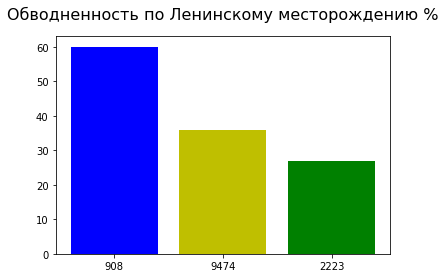

In [145]:
values=data_w['Обводненность']
colors=["b","y","g"]
n=data_w['Скважина']
plt.bar(range(0,3),values,color=colors,tick_label=n)
plt.title(r'Обводненность по Ленинскому месторождению %', fontsize=16, y=1.05);